In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Ejercicio 1

En este ejercicio se define la función isodata, que agrupa pixeles según su similitud de intensidad.
Para esta función se requieren dos funciones auxiliares, una de clasificación que asigna la clasificación en cada iteración, y otra de reasignación que da nuevos valores a los centros de clasificación.

In [2]:
# Función isodata
def isodata(img, C):
    
    v = np.zeros( (C, img.shape[2]) )
    
    # Calcular los centros aleatorios para las clases (C).
    # En una primera iteración fijaremos estos valores para poder depurar nuestra
    # función con los valores que esperamos.
    
    v[0,:] = (  30.,  60., 30. )
    v[1,:] = (  60.,  70., 30. )
    v[2,:] = (  20.,  40., 20. )
    v[3,:] = ( 100., 150., 40. )
    
    # Crear resimg (Imagen resultado).
    
    resimg = np.ones( (img.shape[0], img.shape[1]), dtype = int)
    
    res = True
    n = 0
    while res:
        
        resimg, lc = clasificacion(img,v,resimg)
        
        vp = v.copy()
        
        for i in range(len(lc)):
            if len(lc[i]) > 0:
                v[i] = reasignacion(lc[i])
                
        mod = True
        for j in range(v.shape[0]):
            for k in range(v.shape[1]):
                mod = mod and (vp[j][k] - v[j][k]) == 0
        
        if mod:
            res = False
            
        n += 1
    
    return resimg,n

# Función para clasificar cada pixel

def clasificacion(img,centros,resimg):
    
    lc = list()
    for z in range(centros.shape[0]):
        lc.append(list())
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j][0] == 0 and img[i,j][1] == 0 and img[i,j][2] == 0:
                resimg[i,j] = 0
            else:
                dist = list()
                for v in centros:
                    d = np.sqrt((np.power((img[i][j][0]-v[0]),2))
                                 +(np.power((img[i][j][1]-v[1]),2))
                                 +(np.power((img[i][j][2]-v[2]),2)))
                    dist.append(d)

                c = dist.index(min(dist))
                
                lc[c].append((img[i,j][0],img[i,j][1],img[i,j][2]))
                resimg[i,j] = c+1
                
    return resimg, lc


# Función para reasignar valores a los centros de clasificación
def reasignacion(c):
    
    medC1 = 0
    medC2 = 0
    medC3 = 0
    
    for t in c:
        medC1 += t[0]
        medC2 += t[1]
        medC3 += t[2]
        
    medC = (medC1/len(c),medC2/len(c),medC3/len(c))
    
    return medC

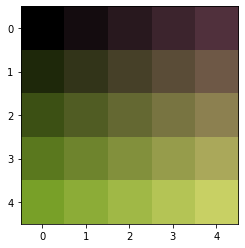

In [3]:
# Generador de degradado
tam = 5

b1 = np.zeros([tam,tam,1],dtype=np.uint8)
b2 = np.zeros([tam,tam,1],dtype=np.uint8)
b3 = np.zeros([tam,tam,1],dtype=np.uint8)

for i in range(b1.shape[0]):
    for j in range(b1.shape[0]):
        b1[i,j] = j*20+i*30
        b2[i,j] = j*12+i*40
        b3[i,j] = j*15+i*10
    
img = cv.merge((b1,b2,b3))
plt.figure(1)
plt.imshow(img)
plt.show()

In [4]:
res,n = isodata(img,4)
print("Iteraciones hasta que los centroides se estabilizan:",n,"\n\n",res)

Iteraciones hasta que los centroides se estabilizan: 5 

 [[0 3 3 1 1]
 [3 1 1 2 2]
 [1 2 2 2 4]
 [2 2 4 4 4]
 [4 4 4 4 4]]


In [5]:
# Colorea con un seudocolor el resultado de la clasificación.
# Función seudo
def seudo(img):
    
    resimg = np.zeros((img.shape[0],img.shape[1],3),np.uint8)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] == 0:
                resimg[i,j,:] = [255,0,0]
            elif img[i,j] == 1:
                resimg[i,j,:] = [0,255,0]
            elif img[i,j] == 2:
                resimg[i,j,:] = [0,0,255]
            elif img[i,j] == 3:
                resimg[i,j,:] = [255,255,0]
            elif img[i,j] == 4:
                resimg[i,j,:] = [0,255,255]
            elif img[i,j] == 5:
                resimg[i,j,:] = [255,0,255]
            else:
                resimg[i,j,:] = [0,0,0]
                
    return resimg

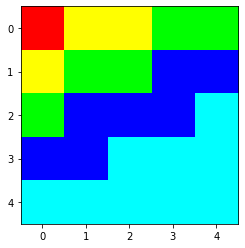

In [6]:
res_seudo = seudo(res)
plt.figure(2)
plt.imshow(res_seudo)
plt.show()

In [8]:
img

array([[[  0,   0,   0],
        [ 20,  12,  15],
        [ 40,  24,  30],
        [ 60,  36,  45],
        [ 80,  48,  60]],

       [[ 30,  40,  10],
        [ 50,  52,  25],
        [ 70,  64,  40],
        [ 90,  76,  55],
        [110,  88,  70]],

       [[ 60,  80,  20],
        [ 80,  92,  35],
        [100, 104,  50],
        [120, 116,  65],
        [140, 128,  80]],

       [[ 90, 120,  30],
        [110, 132,  45],
        [130, 144,  60],
        [150, 156,  75],
        [170, 168,  90]],

       [[120, 160,  40],
        [140, 172,  55],
        [160, 184,  70],
        [180, 196,  85],
        [200, 208, 100]]], dtype=uint8)

In [9]:
img[0]

array([[ 0,  0,  0],
       [20, 12, 15],
       [40, 24, 30],
       [60, 36, 45],
       [80, 48, 60]], dtype=uint8)

In [10]:
img[0,0]

array([0, 0, 0], dtype=uint8)

In [11]:
img[0][0]

array([0, 0, 0], dtype=uint8)

In [12]:
img[0,0,0]

0

In [13]:
img[0,0][0]

0

In [14]:
img[0][0][0]

0

In [15]:
img[0][0,0]

0